# Assignment

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [5]:
import pandas as pd
import numpy as np
from pandas import merge_ordered
from datetime import datetime

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


In [103]:
pd.to_datetime(churn['timestamp'])

0        2000-11-01
1        2000-11-01
2        2000-11-01
3        2000-11-01
4        2000-11-01
            ...    
252199   2001-02-28
252200   2001-02-28
252201   2001-02-28
252202   2001-02-28
252203   2001-02-28
Name: timestamp, Length: 252204, dtype: datetime64[ns]

Here I am importing pandas and numpy. I didn't need datetime. 
I copy and pasted this from the in class assignment. It worked. 

In [104]:
# use .groupby and aggregate the functions to build a dataframe of key measures by day
"""
Pivot the dataframe so that each column corresponds to a single day,
and each row is an aggregate function output on a given variable for that day.

_timestamp_ = timestamp of the day 
_weekday_ = numeric mapping for day of the week s.t. {0-6:'Sun'-'Sat'}
_transactions_ = number of transactions per day (unique is implied by the data structure)
_unique_users_ = number of unique users per day
_items_ = number of unique items sold
_total_quantity_ = total quantity of goods sold
_avg_quantity_ = average quantity of goods sold per transaction
_total_value_ = total revenue from goods sold taht day (sum of all dollar amounts)
_avg_value_ = average value of each transaction
"""

agg_data_byday = pd.DataFrame({'timestamp':list(churn.groupby('timestamp')['timestamp'].agg(lambda x: x.unique())),
                               'weekday': [pd.Timestamp(ts).weekday() for ts in list(churn.groupby('timestamp')['timestamp'].agg(lambda x:x.unique()))],
                               'transactions': list(churn.groupby('timestamp')['trans_id'].count()),
                               'unique_users': list(churn.groupby('timestamp')['user_id'].agg(lambda x: len(x.unique()))),
                               'items': list(churn.groupby('timestamp')['item_id'].agg(lambda x: len(x.unique()))),
                               'total_quantity': list(churn.groupby('timestamp')['quantity'].sum()),
                               'avg_quantity': list(churn.groupby('timestamp')['quantity'].agg(np.mean)),
                               'total_value': list(churn.groupby('timestamp')['dollar'].sum()),
                               'avg_value': list(churn.groupby('timestamp')['dollar'].agg(np.mean))})

agg_data_byday

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value
0,1/1/2001 0:00,0,3508,462,253,4600,1.311288,407119,116.054447
1,1/10/2001 0:00,2,1231,233,124,1716,1.393989,160598,130.461413
2,1/11/2001 0:00,3,1446,254,147,1959,1.354772,210508,145.579530
3,1/12/2001 0:00,4,1579,255,143,2212,1.400887,212543,134.606080
4,1/13/2001 0:00,5,3394,432,261,4589,1.352092,512847,151.104007
...,...,...,...,...,...,...,...,...,...
115,2/5/2001 0:00,0,1909,319,172,2591,1.357255,224437,117.567837
116,2/6/2001 0:00,1,1744,289,163,2554,1.464450,219841,126.055619
117,2/7/2001 0:00,2,1557,264,135,2172,1.394990,186324,119.668593
118,2/8/2001 0:00,3,1481,261,143,2157,1.456448,199649,134.806887


In [129]:
churn_data_by_day.sort_values('timestamp')

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
0,2000-11-01,2,323,55,38,428,1.325077,26518,82.099071,NaN,5.872727
1,2000-11-02,3,2411,327,188,3411,1.414766,253982,105.343011,NaN,7.373089
2,2000-11-03,4,2059,308,170,2871,1.394366,249213,121.035940,NaN,6.685065
3,2000-11-04,5,3120,377,262,4150,1.330128,401265,128.610577,NaN,8.275862
4,2000-11-05,6,4713,503,303,6152,1.305326,544739,115.582219,NaN,9.369781
...,...,...,...,...,...,...,...,...,...,...,...
123,2001-03-28,2,2876,384,217,3812,1.325452,371163,129.055285,12.0,7.489583
124,2001-04-04,2,2876,384,217,3812,1.325452,371163,129.055285,13.0,7.489583
125,2001-04-11,2,2876,384,217,3812,1.325452,371163,129.055285,14.0,7.489583
126,2001-04-18,2,2876,384,217,3812,1.325452,371163,129.055285,15.0,7.489583


In [159]:
# create a dict of dates by week
weeks_by_date = pd.DataFrame({'timestamp':np.array(pd.date_range(start=('2000-11-01'), periods=17, freq='W-WED')), 'week':np.arange(0,17,1)})
                              # 'week':np.arrange(0,17,1)})
  #  min(churn['timestamp']), 
   #                                                              periods=17, freq='W-WED')),'week':np.arange(0,17,1)})

In [161]:
weeks_by_date.dtypes

timestamp    datetime64[ns]
week                  int64
dtype: object

In [140]:
# create a dict of dates by week
#weeks_by_date = pd.DataFrame({'timestamp':np.array(pd.date_range(min(churn['timestamp']), 
#                                                                 periods=17, freq='W-WED')),'week':np.arange(0,17,1)})

,timestamp,week
0,2001-01-03,0
1,2001-01-10,1
2,2001-01-17,2
3,2001-01-24,3
4,2001-01-31,4
5,2001-02-07,5
6,2001-02-14,6
7,2001-02-21,7
8,2001-02-28,8
9,2001-03-07,9


In [107]:
pd.to_datetime(weeks_by_date['timestamp'])

0    2001-01-03
1    2001-01-10
2    2001-01-17
3    2001-01-24
4    2001-01-31
5    2001-02-07
6    2001-02-14
7    2001-02-21
8    2001-02-28
9    2001-03-07
10   2001-03-14
11   2001-03-21
12   2001-03-28
13   2001-04-04
14   2001-04-11
15   2001-04-18
16   2001-04-25
Name: timestamp, dtype: datetime64[ns]

In [108]:
churn['timestamp'].astype('datetime64[ns]')

0        2000-11-01
1        2000-11-01
2        2000-11-01
3        2000-11-01
4        2000-11-01
            ...    
252199   2001-02-28
252200   2001-02-28
252201   2001-02-28
252202   2001-02-28
252203   2001-02-28
Name: timestamp, Length: 252204, dtype: datetime64[ns]

In [109]:
weeks_by_date['timestamp'].astype('datetime64[ns]')

0    2001-01-03
1    2001-01-10
2    2001-01-17
3    2001-01-24
4    2001-01-31
5    2001-02-07
6    2001-02-14
7    2001-02-21
8    2001-02-28
9    2001-03-07
10   2001-03-14
11   2001-03-21
12   2001-03-28
13   2001-04-04
14   2001-04-11
15   2001-04-18
16   2001-04-25
Name: timestamp, dtype: datetime64[ns]

In [110]:
agg_data_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       120 non-null    object 
 1   weekday         120 non-null    int64  
 2   transactions    120 non-null    int64  
 3   unique_users    120 non-null    int64  
 4   items           120 non-null    int64  
 5   total_quantity  120 non-null    int64  
 6   avg_quantity    120 non-null    float64
 7   total_value     120 non-null    int64  
 8   avg_value       120 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 8.6+ KB


In [115]:
# pd.to_datetime(agg_data_byday['timestamp']) <-- this did not work
agg_data_byday['timestamp']=agg_data_byday['timestamp'].astype('datetime64')

In [116]:
agg_data_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       120 non-null    datetime64[ns]
 1   weekday         120 non-null    int64         
 2   transactions    120 non-null    int64         
 3   unique_users    120 non-null    int64         
 4   items           120 non-null    int64         
 5   total_quantity  120 non-null    int64         
 6   avg_quantity    120 non-null    float64       
 7   total_value     120 non-null    int64         
 8   avg_value       120 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 8.6 KB


In [162]:
#weeks_by_date['timestamp'] = weeks_by_date['timestamp'].astype(datetime64)
# join the primary data set to a set of week numbers by date, using forward fill to populate the new column
churn_data_by_day = pd.merge_ordered(agg_data_byday, weeks_by_date, on='timestamp', fill_method='ffill')

In [163]:
# add column for transactions-per-user
churn_data_by_day['avg_trans_per_user'] = churn_data_by_day['transactions']/churn_data_by_day['unique_users']

In [164]:
churn_data_by_day

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
0,2000-11-01,2,323,55,38,428,1.325077,26518,82.099071,0,5.872727
1,2000-11-02,3,2411,327,188,3411,1.414766,253982,105.343011,0,7.373089
2,2000-11-03,4,2059,308,170,2871,1.394366,249213,121.035940,0,6.685065
3,2000-11-04,5,3120,377,262,4150,1.330128,401265,128.610577,0,8.275862
4,2000-11-05,6,4713,503,303,6152,1.305326,544739,115.582219,0,9.369781
...,...,...,...,...,...,...,...,...,...,...,...
115,2001-02-24,5,3123,421,201,4234,1.355748,389138,124.603907,16,7.418052
116,2001-02-25,6,3849,485,265,4996,1.297999,466074,121.089634,16,7.936082
117,2001-02-26,0,1183,260,106,1664,1.406593,155349,131.317836,16,4.550000
118,2001-02-27,1,1344,252,118,1847,1.374256,161836,120.413690,16,5.333333


In [165]:
churn_data_by_day.filter(items = range(0, 64), axis = 0).filter(items = ["timestamp", "weekday", "week"], axis = 1)
#on quiz!!

,timestamp,weekday,week
0,2000-11-01,2,0
1,2000-11-02,3,0
2,2000-11-03,4,0
3,2000-11-04,5,0
4,2000-11-05,6,0
...,...,...,...
59,2000-12-30,5,8
60,2000-12-31,6,8
61,2001-01-01,0,8
62,2001-01-02,1,8


In [120]:
churn_data_by_day.dtypes

timestamp             datetime64[ns]
weekday                        int64
transactions                   int64
unique_users                   int64
items                          int64
total_quantity                 int64
avg_quantity                 float64
total_value                    int64
avg_value                    float64
week                         float64
avg_trans_per_user           float64
dtype: object

In [166]:
# convert week, unique users, transactions, weekday, items, and total_quantity to integer type
churn_data_by_day.astype({'weekday':int, 'transactions':int,'unique_users':int, 'items':int, 'total_quantity':int, 'week':int})

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
0,2000-11-01,2,323,55,38,428,1.325077,26518,82.099071,0,5.872727
1,2000-11-02,3,2411,327,188,3411,1.414766,253982,105.343011,0,7.373089
2,2000-11-03,4,2059,308,170,2871,1.394366,249213,121.035940,0,6.685065
3,2000-11-04,5,3120,377,262,4150,1.330128,401265,128.610577,0,8.275862
4,2000-11-05,6,4713,503,303,6152,1.305326,544739,115.582219,0,9.369781
...,...,...,...,...,...,...,...,...,...,...,...
115,2001-02-24,5,3123,421,201,4234,1.355748,389138,124.603907,16,7.418052
116,2001-02-25,6,3849,485,265,4996,1.297999,466074,121.089634,16,7.936082
117,2001-02-26,0,1183,260,106,1664,1.406593,155349,131.317836,16,4.550000
118,2001-02-27,1,1344,252,118,1847,1.374256,161836,120.413690,16,5.333333


In [167]:
churn_data_by_day.sample(100).head(15).sort_values('timestamp')

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
1,2000-11-02,3,2411,327,188,3411,1.414766,253982,105.343011,0,7.373089
2,2000-11-03,4,2059,308,170,2871,1.394366,249213,121.035940,0,6.685065
8,2000-11-09,3,2063,372,173,2917,1.413960,227302,110.180320,1,5.545699
11,2000-11-12,6,4070,514,282,5535,1.359951,483470,118.788698,1,7.918288
52,2000-12-23,5,296,45,42,395,1.334459,31447,106.239865,7,6.577778
54,2000-12-25,0,357,62,47,483,1.352941,35013,98.075630,7,5.758065
56,2000-12-27,2,1370,275,125,2282,1.665693,306423,223.666423,8,4.981818
58,2000-12-29,4,1346,228,125,1759,1.306835,158701,117.905646,8,5.903509
68,2001-01-08,0,1571,255,160,2158,1.373647,261884,166.698918,9,6.160784
69,2001-01-09,1,1083,213,128,1458,1.346260,138626,128.001847,9,5.084507


In [ ]:
# use .groupby and agg functions to build a dataframe of key measures by day
agg_data_by_day = pd.DataFrame({'timestamp':list(churn.groupby('timestamp')['timestamp'].agg(lambda x: x.unique())),
                                'weekday':[pd.Timestamp(ts).weekday() for ts in list(churn.groupby('timestamp')['timestamp'].agg(lambda x: x.unique()))],
                                'transactions':list(churn.groupby('timestamp')['trans_id'].count()),
                                'unique_users':list(churn.groupby('timestamp')['user_id'].agg(lambda x: len(x.unique()))),
                                'items':list(churn.groupby('timestamp')['item_id'].agg(lambda x: len(x.unique()))),
                                'total_quantity':list(churn.groupby('timestamp')['quantity'].sum()),
                                'avg_quantity':list(churn.groupby('timestamp')['quantity'].agg(np.mean)),
                                'total_value':list(churn.groupby('timestamp')['value'].sum()),
                                'avg_value':list(churn.groupby('timestamp')['value'].agg(np.mean))})

# create a dict of dates by week
weeks_by_date = pd.DataFrame({'timestamp':np.array(pd.date_range(min(churn['timestamp']), 
                                                                 periods=17, freq='W-WED')),'week':np.arange(0,17,1)})

# join the primary data set to a set of week numbers by date, using forward fill to populate the new column
churn_data_by_day = pd.merge_ordered(agg_data_by_day, weeks_by_date, on='timestamp', fill_method='ffill')

# add column for transactions-per-user
churn_data_by_day['avg_trans_per_user'] = churn_data_by_day['transactions']/churn_data_by_day['unique_users']

# convert week, unique users, transactions, weekday, items, and total_quantity to integer type
churn_data_by_day.astype({'weekday':int, 'transactions':int,'unique_users':int, 'items':int, 'total_quantity':int, 'week':int})

churn_data_by_day.sample(100).head(15).sort_values('timestamp')

This is my adjusted work and it works really well. It is very elaborate. It creates new columns and eliminates unnecessary ones. Ultimately it is 120 rows specifc by day and everything that happened on that day.

In [170]:
churn_data_by_day.shape

(120, 11)

Just looking at the shape here, also shown above, 9 columns, 120 rows. This is way less than churn which was 252203 rows and 9 columns.

In [171]:
type(churn_data_by_day)

pandas.core.frame.DataFrame

I am making sure the dataframe i created is in fact a dataframe. I have surprised myself sometimes.

In [172]:
print(churn_data_by_day.dtypes)

timestamp             datetime64[ns]
weekday                        int64
transactions                   int64
unique_users                   int64
items                          int64
total_quantity                 int64
avg_quantity                 float64
total_value                    int64
avg_value                    float64
week                           int64
avg_trans_per_user           float64
dtype: object


A quick look at all the column header types. This are all good but occasionally they need to be changed. I changed two of the churn dataframe columns like data from integer to float (for decimals) and item_id from float to integer (no reason to have decimals on a item id.

In [173]:
churn_data_by_day.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
           dtype='int64', length=120)

Just checking the range index here, mostly just trying new code. Everything is new to me.

Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

In [6]:
# What are the columns?
list(churn.columns)

['user_id',
 'gender',
 'address',
 'store_id',
 'trans_id',
 'timestamp',
 'item_id',
 'quantity',
 'dollar']

Listed the columns from the dataframe nicely with this code. The output is quickly referrable for later code.

In [7]:
# What are their types?
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

Checking datatypes of the agg_data_byday df. They did not need to be changed.

In [8]:
# What is their distribution (when it makes sense)?
churn.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000


This is the describe code. What is unique is everything has decimals, like temporary floats. I noticed there was no "Top" in here like there was when we ran code during class. I wonder how you get top. I think it would be great to go over these with someone who knew these well.

2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

I checked above and felt that all the types in the agg_data_byday worked well. When i used churn, it needed two data types changed, as mentioned above.

In [9]:
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Looking at the head of the agg df. i think the avg value & avg quantity could be minimized to two digits after the decimal. No reason to see one million numbers after the decimal. I also don't think we need the hour and seconds in the timestamp. How to remove that and if I do, will it mess previous/future code?

AttributeError: 'DataFrame' object has no attribute 'week'

There is a question about total weeks coming up and I ran this to determine how many weeks were in the df.

3. Do any columns appear to have all rows with unique categories? How do we show that? <span style="color:red" float:right>[1 point]</span>

In [180]:
#what is meant by categories?
churn_data_by_day.avg_value.unique()

array([ 82.09907121, 105.3430112 , 121.03593978, 128.61057692,
       115.58221939, 116.09948187, 120.84159061, 132.18961039,
       110.18031992, 119.40902101, 128.6638084 , 118.78869779,
       127.62607099, 150.39572193, 139.10954848, 139.46944858,
       133.12374886, 115.49604661, 114.15765766, 111.37537538,
       119.60338484, 159.36918991, 139.61605416, 138.95425934,
       138.5511902 , 152.10578474, 115.59560947, 163.25332651,
       137.98207496, 141.9503012 , 123.08196721, 123.52882562,
       127.82670247, 128.98293723, 127.3318872 , 122.90223793,
       126.39957265, 124.59013786, 120.5567849 , 128.4845447 ,
       134.79272478, 139.78650442, 105.98390636, 117.78464606,
       137.22599418, 125.64278075, 128.54303909, 133.63853904,
        82.51578947,  90.46153846,  73.93193717, 118.19161677,
       106.23986486, 107.51791531,  98.07563025, 144.6358209 ,
       223.66642336, 220.33618844, 117.90564636, 116.61557417,
       122.73409332, 116.05444698, 115.06111834, 224.65

120 unique values?!?! what makes them unique or is it just a fancy word for every value within a column ie avg value...

In [181]:
churn_data_by_day.avg_value.value_counts()

82.099071     1
105.343011    1
143.370259    1
132.092028    1
123.598521    1
             ..
122.902238    1
127.331887    1
128.982937    1
127.826702    1
129.055285    1
Name: avg_value, Length: 120, dtype: int64

In [182]:
churn_data_by_day.week.value_counts()

16    8
9     7
15    7
14    7
13    7
12    7
11    7
10    7
0     7
1     7
7     7
6     7
5     7
4     7
3     7
2     7
8     7
Name: week, dtype: int64

I do this unique value/value counts combo for every column. There are outputs for each. Do I really need to show each one of these combo codes for every column or am I looking for something in particular.

In [45]:
churn.gender.unique() #what do these letters mean?

array(['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A'],
      dtype=object)

In [46]:
churn.gender.value_counts()

D    52987
E    48298
C    43463
F    31637
B    21842
G    16837
A     9658
J     8172
H     7175
K     6197
I     5938
Name: gender, dtype: int64

In [47]:
churn.address.unique() #what do these letters mean?

array(['E', 'H', 'D', 'F', 'G', 'C', 'B', 'A'], dtype=object)

In [48]:
churn.address.value_counts()

E    95740
F    75671
G    23816
C    21689
D    12075
H    12008
A     5904
B     5301
Name: address, dtype: int64

In [51]:
churn.store_id.unique()

array([  2860,   2861,   2862, ..., 251840, 251841, 251842])

In [52]:
churn.store_id.value_counts()

2860      1
213277    1
213279    1
213280    1
213281    1
         ..
191971    1
191972    1
191973    1
191974    1
251842    1
Name: store_id, Length: 252204, dtype: int64

In [53]:
churn.trans_id.unique()

array([ 818463,  818464,  818465, ..., 1630931, 1631033, 1631048])

In [54]:
churn.trans_id.value_counts()

818463     1
1361282    1
1361649    1
1361755    1
1362185    1
          ..
1067792    1
1067890    1
1067892    1
1067896    1
1631048    1
Name: trans_id, Length: 252204, dtype: int64

In [55]:
churn.item_id.unique()

array([4710000000000,  615000000000, 8800000000000, ...,      20461492,
            20434090,      20192310])

In [56]:
churn.item_id.value_counts()

4710000000000    181704
4720000000000     18024
4900000000000      8014
9310000000000      1783
2250000000000      1643
                  ...  
41554696431           1
20561024              1
20505868              1
20521110              1
20192310              1
Name: item_id, Length: 2818, dtype: int64

In [57]:
churn.quantity.unique()

array([   1,    8,    2,    4,    3,    6,    5,   20,   24,   10,   12,
         15,    7,   22,   18,   29,   23,   39,    9,   13,   17,   14,
         33,   11,   36,   16,   60,   21,   48,   72,  852,   30,   27,
         19,  200,  720,  150,   96,   25,   31,   37,  479, 1200,   44,
         50,   28,   38,   35,   74,   69,   62,  168,   68,  111,   54,
         70,   26,   32,   40,   79,   51,   34])

In [58]:
churn.quantity.value_counts()

1      197394
2       39835
3        7023
4        3586
6        2013
        ...  
96          1
720         1
852         1
29          1
34          1
Name: quantity, Length: 62, dtype: int64

In [59]:
churn.dollar.unique()

array([  37.,   17.,   23., ..., 1158., 1797., 1788.])

In [60]:
churn.dollar.value_counts()

99.00       6264
59.00       4160
38.00       4157
89.00       4014
69.00       4009
            ... 
2,257.00       1
2,910.00       1
1,154.00       1
1,114.00       1
1,788.00       1
Name: dollar, Length: 1602, dtype: int64

In [61]:
churn.Date.unique()

array(['11/01/2000', '11/02/2000', '11/03/2000', '11/04/2000',
       '11/05/2000', '11/06/2000', '11/07/2000', '11/08/2000',
       '11/09/2000', '11/10/2000', '11/11/2000', '11/12/2000',
       '11/13/2000', '11/14/2000', '11/15/2000', '11/16/2000',
       '11/17/2000', '11/18/2000', '11/19/2000', '11/20/2000',
       '11/21/2000', '11/22/2000', '11/23/2000', '11/24/2000',
       '11/25/2000', '11/26/2000', '11/27/2000', '11/28/2000',
       '11/29/2000', '11/30/2000', '12/01/2000', '12/02/2000',
       '12/03/2000', '12/04/2000', '12/05/2000', '12/06/2000',
       '12/07/2000', '12/08/2000', '12/09/2000', '12/10/2000',
       '12/11/2000', '12/12/2000', '12/13/2000', '12/14/2000',
       '12/15/2000', '12/16/2000', '12/17/2000', '12/18/2000',
       '12/19/2000', '12/20/2000', '12/21/2000', '12/22/2000',
       '12/23/2000', '12/24/2000', '12/25/2000', '12/26/2000',
       '12/27/2000', '12/28/2000', '12/29/2000', '12/30/2000',
       '12/31/2000', '01/01/2001', '01/02/2001', '01/03

In [62]:
churn.Date.value_counts()

01/21/2001    6402
01/22/2001    6287
01/14/2001    5066
11/05/2000    4713
01/20/2001    4577
              ... 
12/23/2000     296
12/21/2000     191
12/19/2000     190
12/20/2000     169
12/22/2000     167
Name: Date, Length: 120, dtype: int64

In [183]:
for column in churn_data_by_day.columns:
    print('###################')
    print(churn_data_by_day[column].value_counts())

###################
2000-11-01    1
2000-11-02    1
2001-01-28    1
2001-01-27    1
2001-01-26    1
             ..
2000-12-06    1
2000-12-05    1
2000-12-04    1
2000-12-03    1
2001-02-28    1
Name: timestamp, Length: 120, dtype: int64
###################
2    18
3    17
4    17
5    17
6    17
0    17
1    17
Name: weekday, dtype: int64
###################
1669    2
323     1
1706    1
1487    1
641     1
       ..
1698    1
1383    1
1641    1
4097    1
2876    1
Name: transactions, Length: 119, dtype: int64
###################
296    3
325    2
264    2
329    2
248    2
      ..
381    1
245    1
311    1
437    1
384    1
Name: unique_users, Length: 107, dtype: int64
###################
143    3
170    3
253    3
186    3
144    3
      ..
145    1
146    1
275    1
137    1
118    1
Name: items, Length: 87, dtype: int64
###################
2015    2
428     1
2194    1
2251    1
2024    1
       ..
2295    1
1905    1
3445    1
5382    1
3812    1
Name: total_quantity, Length:

This code worked. It came from the lesson. I do not know exactly what it is used for. I also don't know the exact number of hash tags necessary or why we need a million hashtags at all.... 

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

In [184]:
import pandas as pd
import numpy as np
# you need to run the following line to produce visualizations in a jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#vis = pd.read_csv('retail-churn.csv', sep = ',', header = None, index_col=None, #usecols=None, engine=None, skiprows=None, nrows=None  
#                  names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar'])


#vis = pd.read_csv('retail-churn.csv', sep = ',', header = None, index_col=None, #usecols=None, engine=None, skiprows=None, nrows=None  
#                  names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'item_id', 'quantity', 'dollar', 'Date'])

#vis = pd.read_csv('retail-churn.csv', sep = ',', header = None, index_col=None, 
#names = ['Date', 'quantity', 'dollar'])

#vis.head()

These imports are in preparation for the data visualization of the df.

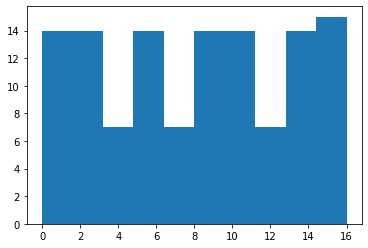

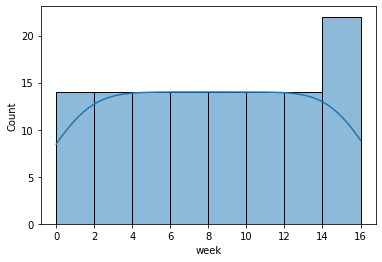

In [186]:
plt.hist(churn_data_by_day['week']);
plt.show()
sns.histplot(churn_data_by_day["week"], kde = True); # sns.distplot(auto["mpg"]);
plt.show()

The question does not ask for this. This is me testing what we learn in the lesson on the df.

In [187]:
churn_data_by_day.corr()

,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
weekday,1.000000,0.457869,0.322854,0.427380,0.437843,-0.174672,0.413786,-0.113634,-0.006723,0.623350
transactions,0.457869,1.000000,0.944128,0.968475,0.990347,-0.112519,0.972150,0.063496,0.023351,0.767185
unique_users,0.322854,0.944128,1.000000,0.929332,0.950013,-0.000693,0.920677,0.128319,0.086360,0.549485
items,0.427380,0.968475,0.929332,1.000000,0.956306,-0.136196,0.957826,0.139148,0.031997,0.739581
total_quantity,0.437843,0.990347,0.950013,0.956306,1.000000,0.015902,0.973706,0.100118,0.006651,0.732009
avg_quantity,-0.174672,-0.112519,-0.000693,-0.136196,0.015902,1.000000,-0.039856,0.349837,-0.089639,-0.305045
total_value,0.413786,0.972150,0.920677,0.957826,0.973706,-0.039856,1.000000,0.248884,0.030854,0.725850
avg_value,-0.113634,0.063496,0.128319,0.139148,0.100118,0.349837,0.248884,1.000000,0.070952,-0.150483
week,-0.006723,0.023351,0.086360,0.031997,0.006651,-0.089639,0.030854,0.070952,1.000000,-0.117144
avg_trans_per_user,0.623350,0.767185,0.549485,0.739581,0.732009,-0.305045,0.725850,-0.150483,-0.117144,1.000000


I believe this is what the question is asking for. To answer the question, there are negative numbers on quantity (there is not a column named volume but quantity is the same) on display using this code. But why.... So total quantity does not have a negative but average quantity does. I am not sure why average quantity does.

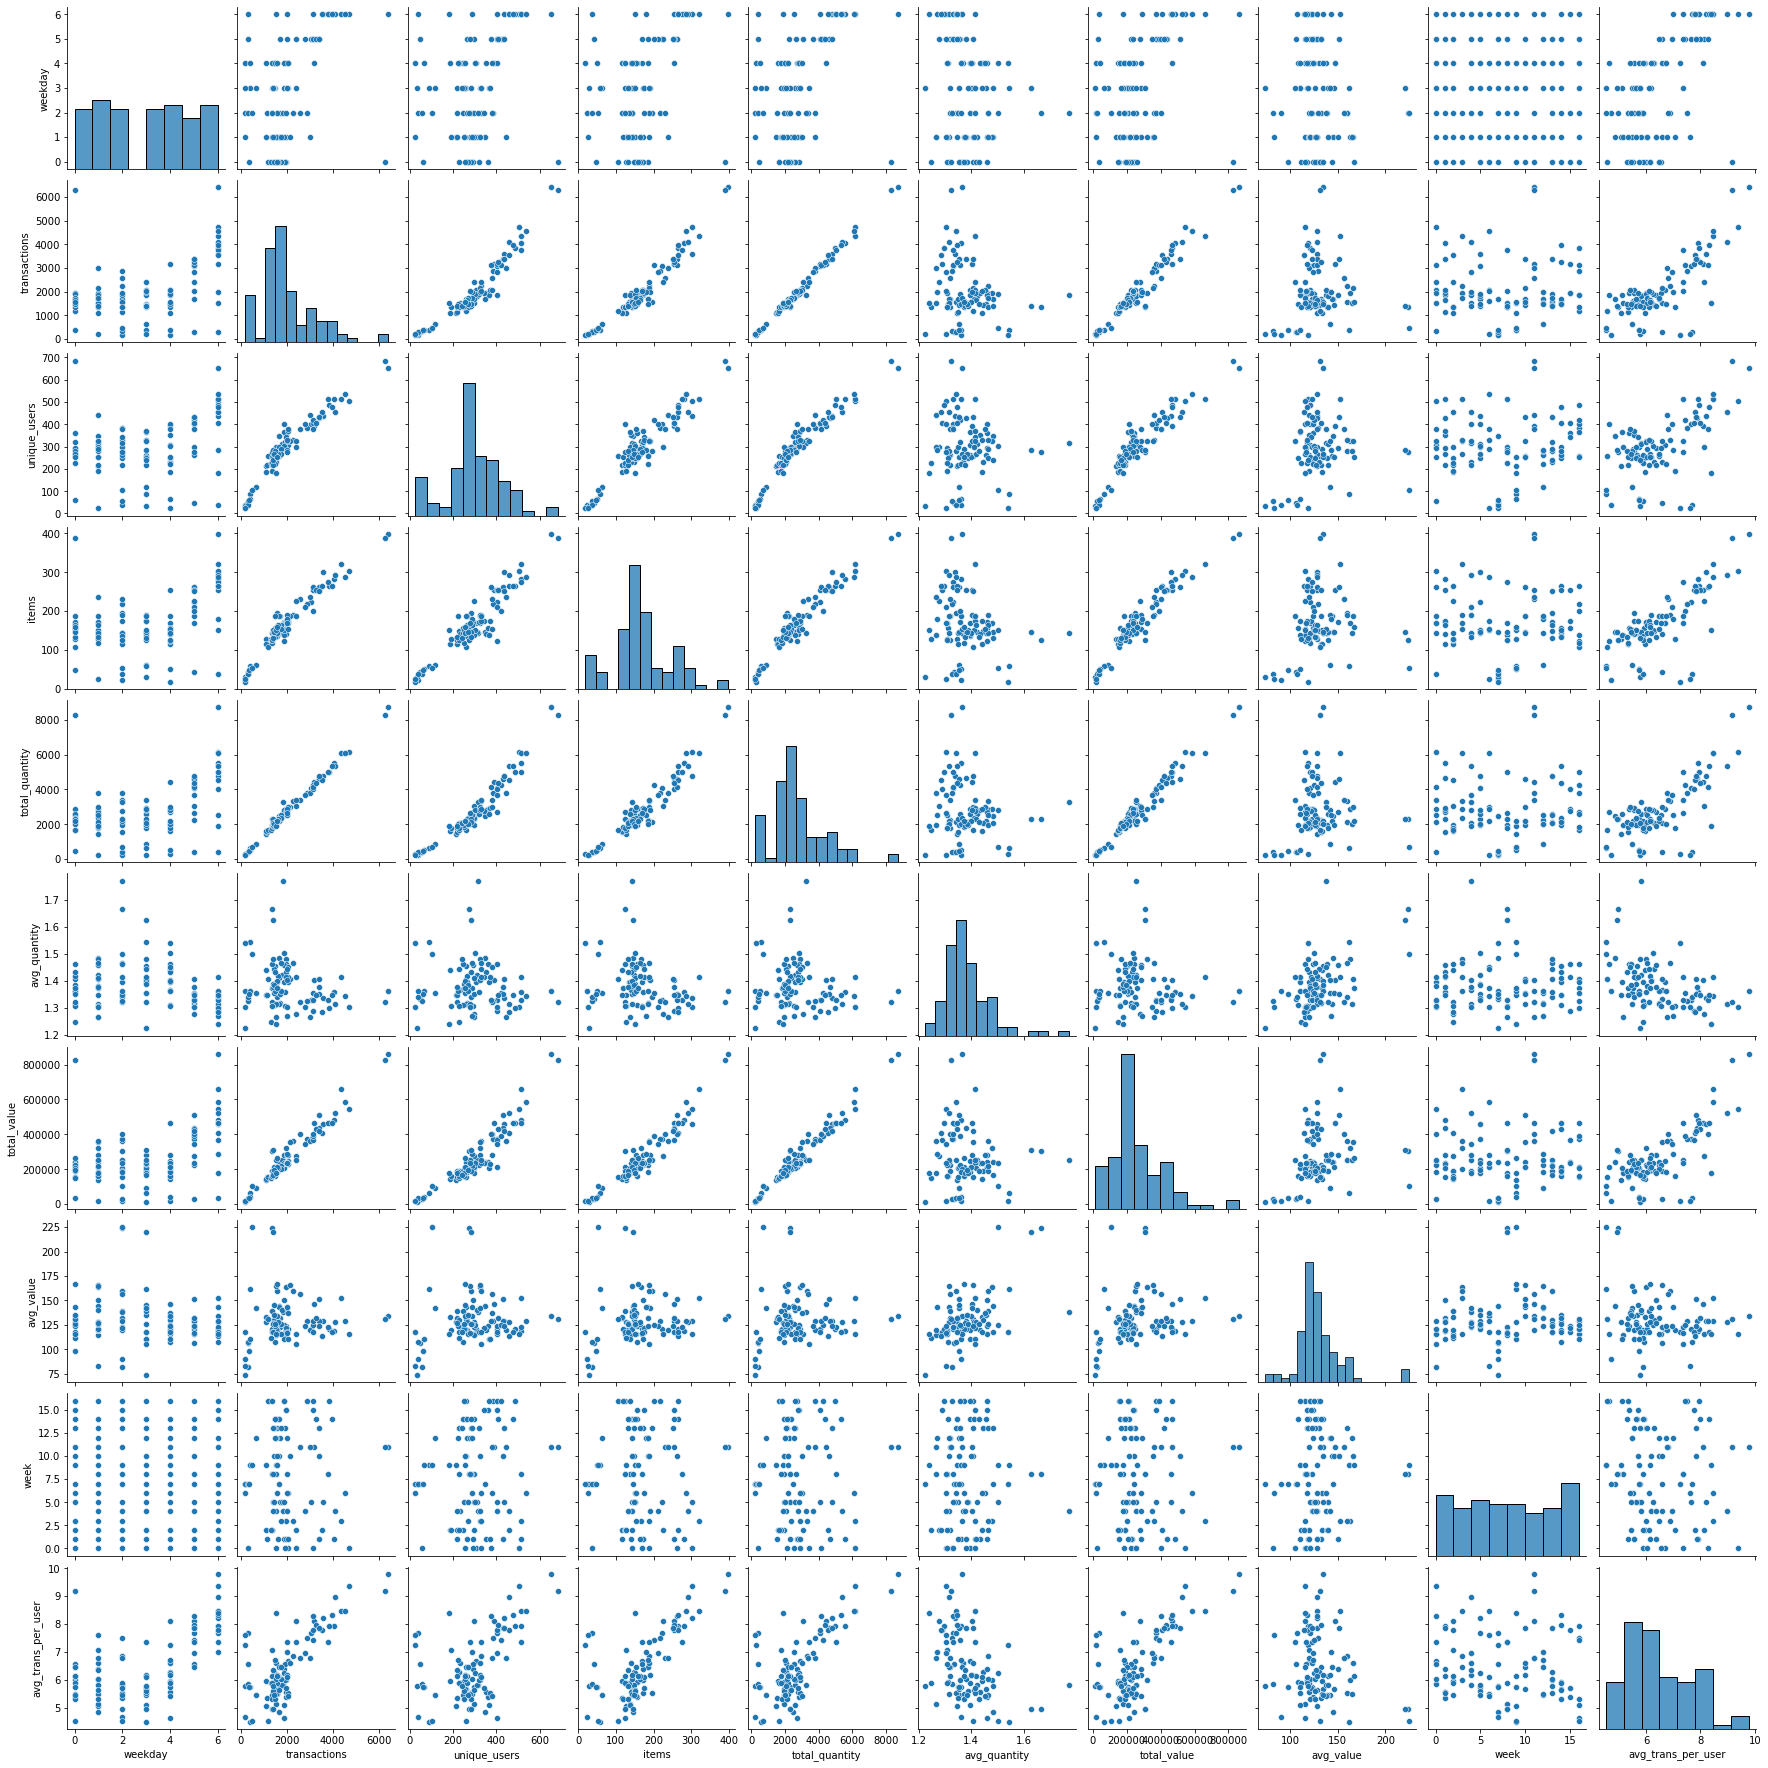

In [188]:
sns.pairplot(churn_data_by_day.sample(100));

This data vis is an eye sore. I would love a breakdwon of each of these graphs/hist/etc and I would like to know why they need to be bundled like this.

This code shows the date range of the data. I used the churn df instead of the agg df b/c the agg df was bunched together by date. I did not know exactly how to pull that answer from the agg df. I could try aggdf.weekday.value_counts()...

In [191]:
churn_data_by_day.sort_values(by = ['timestamp'], ascending = [True], inplace = True)
#churn.sort_values(by=['timestamp'])
churn_data_by_day.timestamp.iloc[:] #spot check for sorting
#churn.sort_values(by='timestamp', ascending=False, na_position='first')
#churn.filter(like = 'timestamp', axis = 1)

0     2000-11-01
1     2000-11-02
2     2000-11-03
3     2000-11-04
4     2000-11-05
         ...    
115   2001-02-24
116   2001-02-25
117   2001-02-26
118   2001-02-27
119   2001-02-28
Name: timestamp, Length: 120, dtype: datetime64[ns]

In [192]:
#What is the date range covered by the data?
churn_data_by_day.timestamp.value_counts()

2000-11-01    1
2000-11-02    1
2001-01-28    1
2001-01-27    1
2001-01-26    1
             ..
2000-12-06    1
2000-12-05    1
2000-12-04    1
2000-12-03    1
2001-02-28    1
Name: timestamp, Length: 120, dtype: int64

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

In [193]:
# How many transactions on average do users have in a given week?
#total transactions / week
churn_data_by_day.transactions.sum()                  

252204

In [194]:
churn_data_by_day.weekday.value_counts()

2    18
3    17
4    17
5    17
6    17
0    17
1    17
Name: weekday, dtype: int64

In [195]:
# How many transactions on average do users have in a given week?
ques_1 = 252204 // 17
print("The number of transactions on average by users per week is:", ques_1)

The number of transactions on average by users per week is: 14835


In [196]:
#Are there items that are more commonly sold in bulk (quantity greater than 1)?
#agg_data_byday.items >1
#churn[churn.items.quantity > 1]
#df[df.b > 10]
len(churn_data_by_day[(churn_data_by_day['items']>= 2)]) #& (df['pos']=='Gu') & (df['points']>12)])
#print("The 

120

number 3 the questions only happen at midinght based on this data

6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

In [ ]:
#Total taxes (if tax amount known) on total value by year, day, or timeframe
#Most or least sold items by month
#Average quantity sold per day of week, Reason: Stock more of that item day before or put more people on shift that day of week

8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

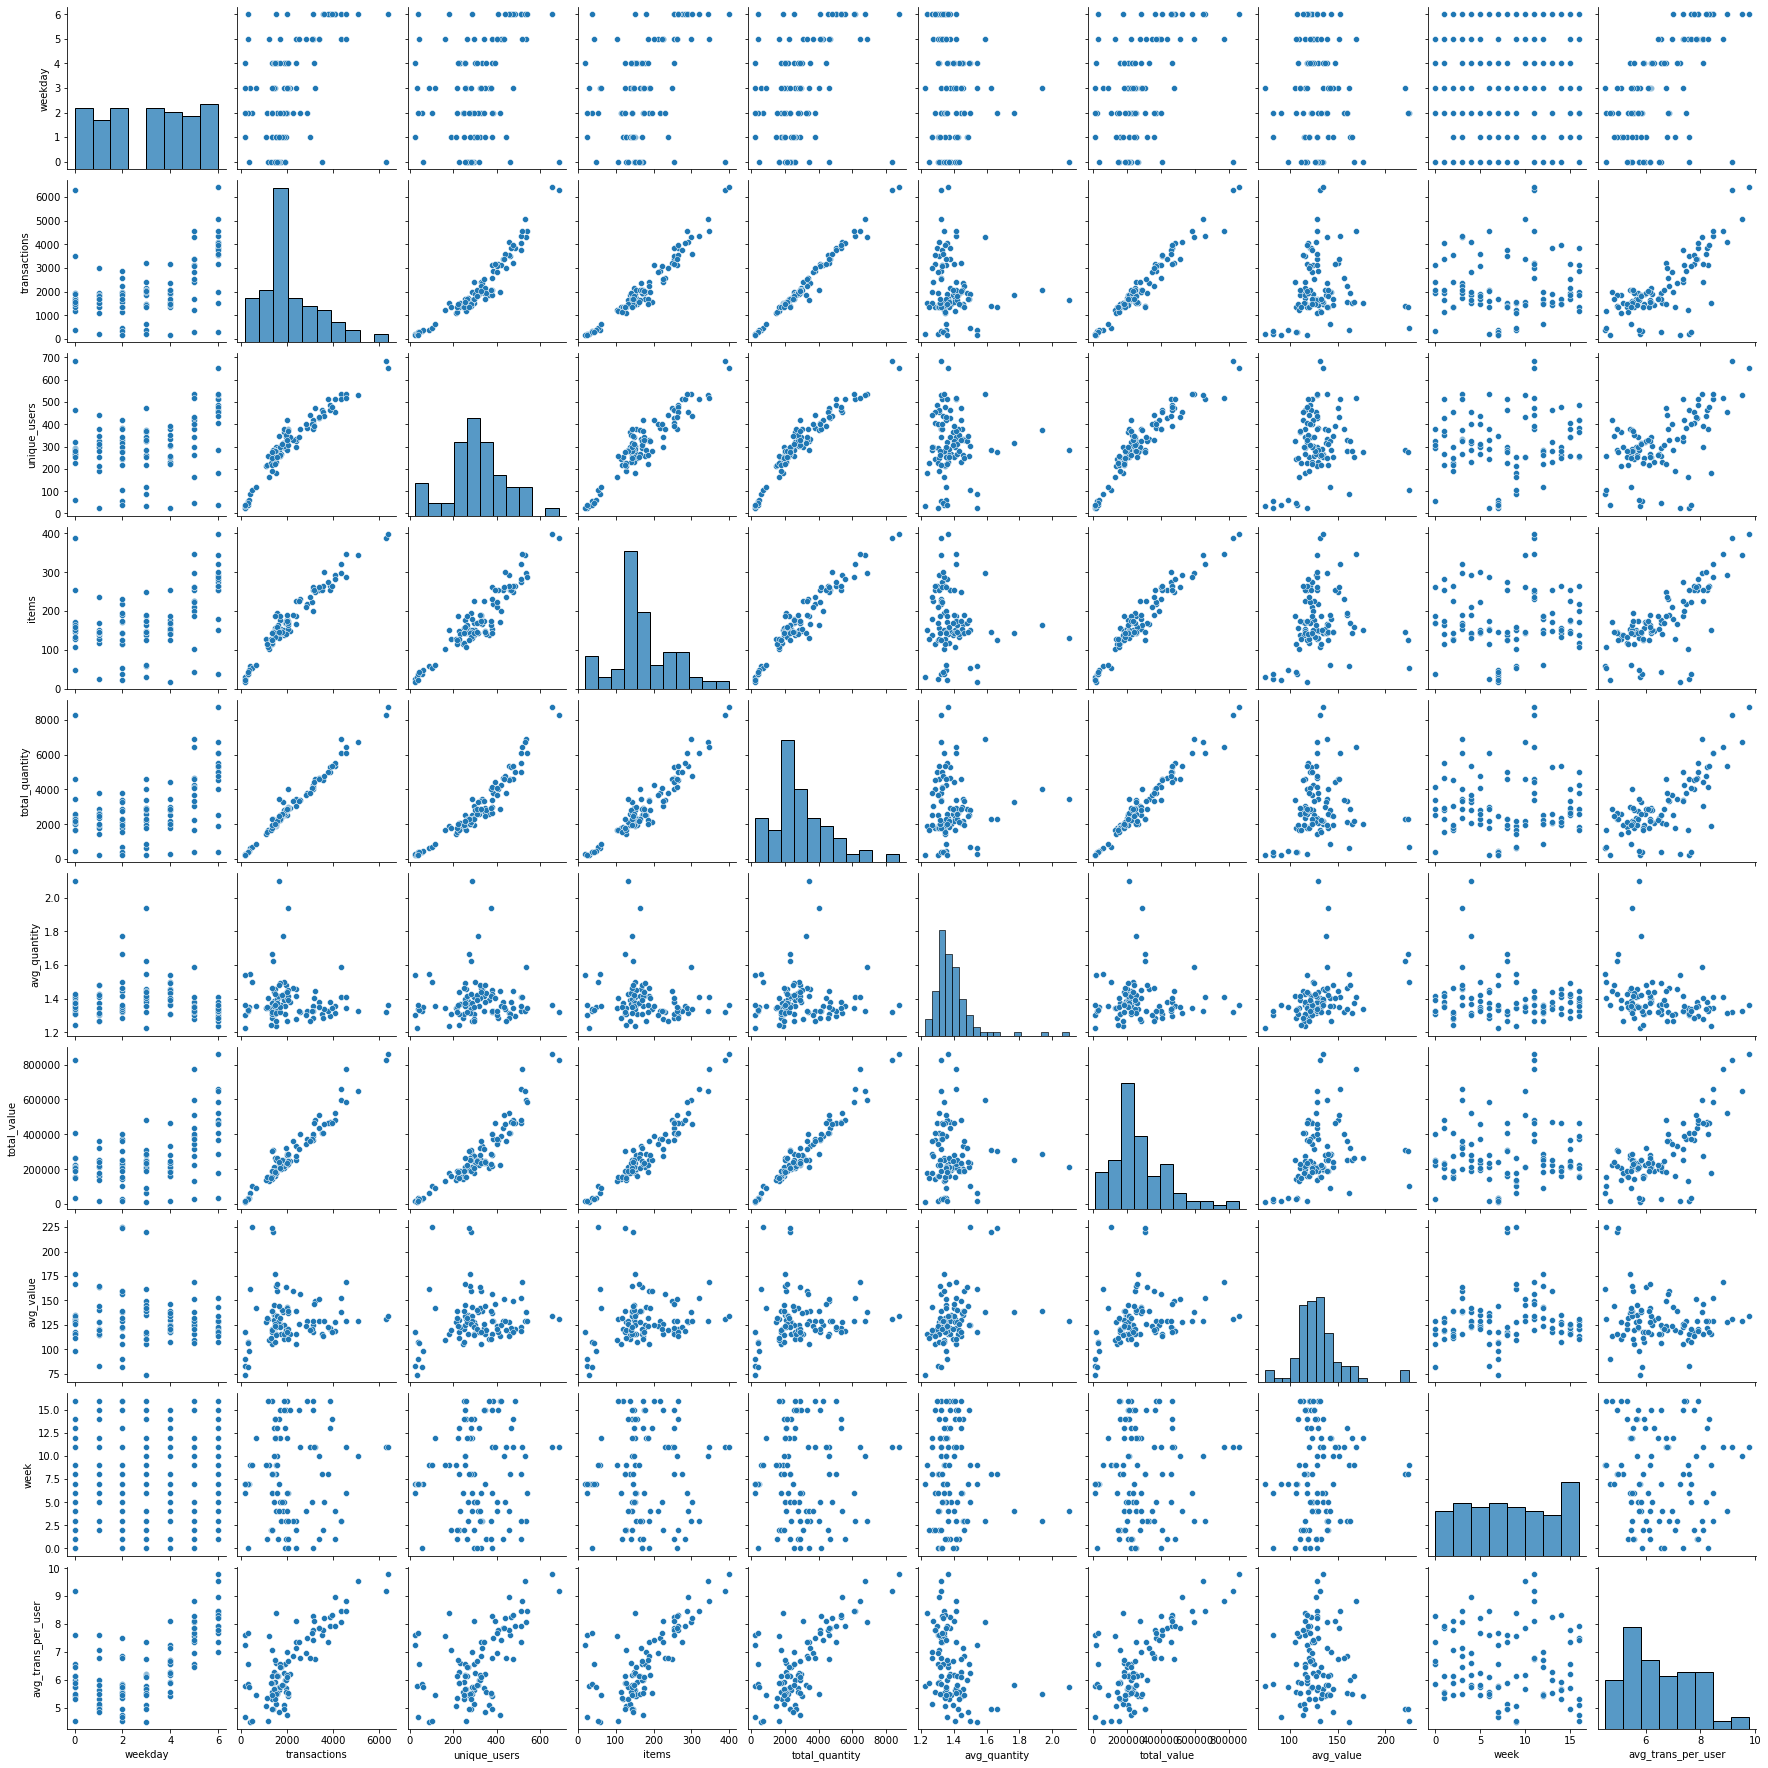

In [197]:
sns.pairplot(churn_data_by_day.sample(100));

<AxesSubplot:>

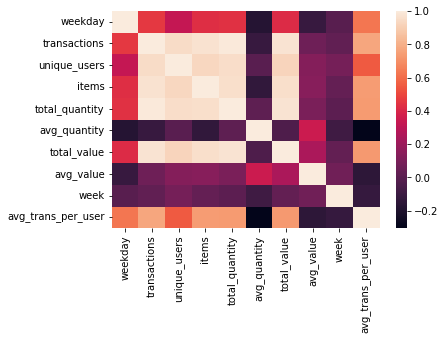

In [199]:
sns.heatmap(churn_data_by_day.corr())

<AxesSubplot:>

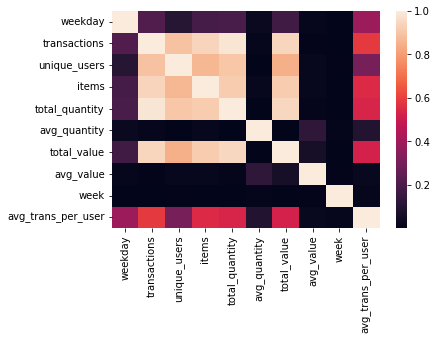

In [201]:
sns.heatmap(churn_data_by_day.corr()*churn_data_by_day.corr())

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

In [202]:
!pip install ydata-profiling

from pandas_profiling import ProfileReport
prof = ProfileReport(churn_data_by_day)
prof.to_file(output_file='Lesson_04.html')

  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached statsmodels-0.13.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.2
    Uninstalling packaging-21.2:
      Successfully uninstalled packaging-21.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.0
    Uninstalling statsmodels-0.13.0:
      Successfully uninstalled statsmodels-0.13.0


/tmp/ipykernel_672/4111541115.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# End of assignment